# H2 vs EnMap 23 April 2025

## Imports

In [1]:
from hypso import Hypso1, Hypso2
import os 
import sys
import matplotlib.pyplot as plt
from global_land_mask import globe 
import numpy as np 
import pandas as pd

funksjoner_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'funksjoner'))
if funksjoner_path not in sys.path:
    sys.path.append(funksjoner_path)

#import funcions_autonom as f
import atmosperic_correction as atm_c ## obs denne het før ac -> kan føre til feil dersom man ikke finner funkjsons navn
import base as ac
import universal_funkjsoner as uf

import xarray as xr
import re
import math
import importlib

from sklearn.cluster import KMeans
from collections import defaultdict

from sklearn.preprocessing import StandardScaler

np.random.seed(42)

dir_path = "../data/" ## filene hentes fra en mappe over der vi er nå

hei fra utformet bedre :)


In [2]:
#importlib.reload(f)
importlib.reload(ac)
importlib.reload(atm_c)
importlib.reload(uf)

hei fra utformet bedre :)


<module 'universal_funkjsoner' from '/home/itk/Documents/AnneMarthe/Master/Hypso_H1_H2/funksjoner/universal_funkjsoner.py'>

## Data uploading 

In [3]:
## H2
i_250423_10 = os.path.join(dir_path, "image64N9E_2025-04-23T10-28-01Z-l1a.nc")
i_250423_10_b = os.path.join(dir_path, "image64N9E_2025-04-23T10-28-01Z-l1b.nc")
i_250423_10_c = os.path.join(dir_path, "image64N9E_2025-04-23T10-28-01Z-l1c.nc")
i_250423_10_d = os.path.join(dir_path, "image64N9E_2025-04-23T10-28-01Z-l1d.nc")

satobj_h2_250423_10 = Hypso2( path = i_250423_10, verbose = True )

l1a_cube_250423_10 = satobj_h2_250423_10.l1a_cube
l1b_cube_250423_10 = Hypso2( path = i_250423_10_b, verbose = True )
l1c_cube_250423_10 = Hypso2( path = i_250423_10_c, verbose = True )
l1d_cube_250423_10 = Hypso2( path = i_250423_10_d, verbose = True )

l1c_cube_250423_10 = l1c_cube_250423_10.l1c_cube
l1b_cube_250423_10 = l1b_cube_250423_10.l1b_cube
l1d_cube_250423_10 = l1d_cube_250423_10.l1d_cube

satobj_h2_250423_10.run_direct_georeferencing() # in order to get the longiyudes and latitudes 

[INFO] Loading L1a capture image64N9E_2025-04-23T10-28-01Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1b capture image64N9E_2025-04-23T10-28-01Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1c capture image64N9E_2025-04-23T10-28-01Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1d capture image64N9E_2025-04-23T10-28-01Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 539
[INFO] ADCS time range: 1745403420.000000 to 1745404350.000000
[INFO] Frame time range: 1745404081.613977 to 1745404156.238977
[INFO] 298 sample(s) inside frame time range
[INFO] Interpolating 598 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry

In [4]:
## H2
i_250423_12 = os.path.join(dir_path, "image64N9E_2025-04-23T12-03-20Z-l1a.nc")
i_250423_12_b = os.path.join(dir_path, "image64N9E_2025-04-23T12-03-20Z-l1b.nc")
i_250423_12_c = os.path.join(dir_path, "image64N9E_2025-04-23T12-03-20Z-l1c.nc")
i_250423_12_d = os.path.join(dir_path, "image64N9E_2025-04-23T12-03-20Z-l1d.nc")

satobj_h2_250423_12 = Hypso2( path = i_250423_12, verbose = True )

l1a_cube_250423_12 = satobj_h2_250423_10.l1a_cube
l1b_cube_250423_12 = Hypso2( path = i_250423_12_b, verbose = True )
l1c_cube_250423_12 = Hypso2( path = i_250423_12_c, verbose = True )
l1d_cube_250423_12 = Hypso2( path = i_250423_12_d, verbose = True )

l1c_cube_250423_12 = l1c_cube_250423_12.l1c_cube
l1b_cube_250423_12 = l1b_cube_250423_12.l1b_cube
l1d_cube_250423_12 = l1d_cube_250423_12.l1d_cube

satobj_h2_250423_12.run_direct_georeferencing() # in order to get the longiyudes and latitudes 

[INFO] Loading L1a capture image64N9E_2025-04-23T12-03-20Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1b capture image64N9E_2025-04-23T12-03-20Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1c capture image64N9E_2025-04-23T12-03-20Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1d capture image64N9E_2025-04-23T12-03-20Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 540
[INFO] ADCS time range: 1745409150.000000 to 1745410080.000000
[INFO] Frame time range: 1745409801.005251 to 1745409875.630251
[INFO] 298 sample(s) inside frame time range
[INFO] Interpolating 598 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry

In [5]:
path_cla_atm_250423_10 = os.path.join(dir_path, "image64N9E_2025-04-23T10-28-01Z-l1c.nc.polymer.nc")######
cla_atm_250423_10 = xr.open_dataset(path_cla_atm_250423_10)

latitude_250423_10 = np.array(cla_atm_250423_10['latitude'])
longitude_250423_10 = np.array(cla_atm_250423_10['longitude'])

In [6]:
path_cla_atm_250423_12 = os.path.join(dir_path, "image64N9E_2025-04-23T12-03-20Z-l1c.nc.polymer.nc")######
cla_atm_250423_12 = xr.open_dataset(path_cla_atm_250423_12)

latitude_250423_12 = np.array(cla_atm_250423_12['latitude'])
longitude_250423_12 = np.array(cla_atm_250423_12['longitude'])

## Target lat long

In [7]:
#wl = satobj_h1_25_0511.wavelengths[9:118]
x_123 = [387.84749685, 391.40406599, 394.95941579, 398.51354623, 402.06645732, 405.61814905, 409.16862143, 412.71787446, 416.26590814, 419.81272246, 423.35831743, 426.90269305, 430.44584931, 433.98778622, 437.52850378, 441.06800198, 444.60628083, 448.14334033, 451.67918047, 455.21380126, 458.7472027, 462.27938479, 465.81034752, 469.3400909 , 472.86861492,476.3959196 , 479.92200491, 483.44687088, 486.97051749, 490.49294475,494.01415266, 497.53414122, 501.05291042, 504.57046026, 508.08679076,511.6019019 , 515.11579369, 518.62846612, 522.13991921, 525.65015294,529.15916731, 532.66696233, 536.173538  , 539.67889432, 543.18303128,546.68594889, 550.18764715, 553.68812606, 557.18738561, 560.68542581,564.18224665, 567.67784814, 571.17223028, 574.66539307, 578.1573365, 581.64806058, 585.1375653 , 588.62585068, 592.1129167 , 595.59876336,599.08339068, 602.56679864, 606.04898725, 609.5299565 , 613.0097064 ,616.48823695, 619.96554815, 623.44163999, 626.91651248, 630.39016561,633.86259939, 637.33381382, 640.8038089 , 644.27258462, 647.74014099,651.20647801, 654.67159568, 658.13549399, 661.59817294, 665.05963255,668.5198728 , 671.9788937 , 675.43669524, 678.89327744, 682.34864028,685.80278376, 689.25570789, 692.70741267, 696.1578981 , 699.60716418,703.0552109 , 706.50203826, 709.94764628, 713.39203494, 716.83520425,720.2771542 , 723.7178848 , 727.15739605, 730.59568795, 734.03276049,737.46861368, 740.90324752, 744.336662  , 747.76885713, 751.19983291,754.62958933, 758.0581264 , 761.48544412, 764.91154248, 768.33642149,771.76008115, 775.18252146, 778.60374241, 782.02374401, 785.44252625,788.86008915, 792.27643269, 795.69155687, 799.10546171, 802.51814719]
wl = x_123[9:118]
print(wl[80])

#target_lat_6 = [64.20992561747796,64.48557437461893,64.52896641587218,  64.22009411667561] #område 7  #må du flytte det tredje koorrdinatet fram her 
#target_lon_6 = [9.704720121565003,9.886201113342556, 8.708294855080245,8.73032214102829]  ## for at det skal blir rett med det nnye inramminga av piksler.

#target_lat_5 = [63.896904083590066,64.17324887890479,64.11631446557637,  63.887923483169004] #område 6.1 ## prøvd å flytte korordinat 3 frem her :))
#target_lon_5 = [9.578289180688513,9.582148298814932,8.924448409066027,  8.96230357578283]
target_lat_6 = [64.152913,64.254748,64.280744,  64.145967]
target_lon_6 = [9.500527 ,9.579630 , 9.258824 ,  9.242894 -0.25]  

target_lat_5 = [63.856648, 63.959085, 63.949196,  63.853017]
target_lon_5 = [9.500427, 9.415833, 9.148865,  9.154358]

target_lat_3 = [63.65192496143867,63.818490304354434,63.793837321385155,  63.660555970548074] #område 2.1.
target_lon_3 = [9.526455044589706,9.531415429238418, 9.442656298818237,9.439764451470932]

target_lat_2 = [63.47865598622861,63.646767083517425,63.61771951990031,  63.42721372576498] #område 5.1
target_lon_2 = [10.061035990832918,9.804697410334523, 9.723689711502818,9.982929114384596]  

target_lat_1 = [63.44802428401152,63.52676744792975, 63.55113867486421,  63.46332195091103] #område 8 
target_lon_1 = [10.706024496195505,10.726421572030368, 10.227932960954064,  10.211631333282082] 

calibration_lat = [63.642540,63.642540, 63.642540,  63.642540] ##
calibration_long = [9.503311,9.503311, 9.503311,  9.503311]

699.60716418


## RRS H2 AC kl 10

Antall piksler i RRS_H1_no_AC: 986
Antall piksler i RRS_H1_no_AC: 697
Antall piksler i RRS_H1_no_AC: 551
Antall piksler i RRS_H1_no_AC: 1336
Antall piksler i RRS_H1_no_AC: 2133


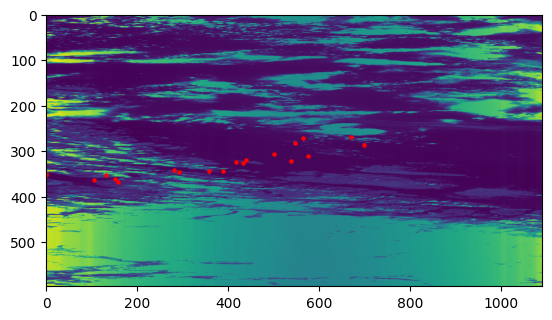

In [8]:

RRS_NO_AC_H1_250511_A1_10 = uf.automated_RRS_NO_AC_H2(satobj_h2_250423_10, l1d_cube_250423_10, target_lat_1, target_lon_1, latitude_250423_10, longitude_250423_12)
RRS_NO_AC_H1_250511_A2_10 = uf.automated_RRS_NO_AC_H2(satobj_h2_250423_10, l1d_cube_250423_10, target_lat_2, target_lon_2, latitude_250423_10, longitude_250423_12)
RRS_NO_AC_H1_250511_A3_10 = uf.automated_RRS_NO_AC_H2(satobj_h2_250423_10, l1d_cube_250423_10, target_lat_3, target_lon_3, latitude_250423_10, longitude_250423_12)
RRS_NO_AC_H1_250511_A4_10 = uf.automated_RRS_NO_AC_H2(satobj_h2_250423_10, l1d_cube_250423_10, target_lat_5, target_lon_5, latitude_250423_10, longitude_250423_12)
RRS_NO_AC_H1_250511_A5_10 = uf.automated_RRS_NO_AC_H2(satobj_h2_250423_10, l1d_cube_250423_10, target_lat_6, target_lon_6, latitude_250423_10, longitude_250423_12)


In [9]:
RRS_median_H1_NO_AC_A1_10 = np.median(RRS_NO_AC_H1_250511_A1_10, axis=0)
RRS_median_H1_NO_AC_A2_10 = np.median(RRS_NO_AC_H1_250511_A2_10, axis=0)
RRS_median_H1_NO_AC_A3_10 = np.median(RRS_NO_AC_H1_250511_A3_10, axis=0)
RRS_median_H1_NO_AC_A4_10 = np.median(RRS_NO_AC_H1_250511_A4_10, axis=0)
RRS_median_H1_NO_AC_A5_10 = np.median(RRS_NO_AC_H1_250511_A5_10, axis=0)

print(RRS_median_H1_NO_AC_A1_10.shape)

(109,)


## RRS H2 Ac kl 12

hei fra utformet bedre :)
Antall piksler i RRS_H1_no_AC: 1388
Antall piksler i RRS_H1_no_AC: 613
Antall piksler i RRS_H1_no_AC: 506
Antall piksler i RRS_H1_no_AC: 1173
Antall piksler i RRS_H1_no_AC: 1921


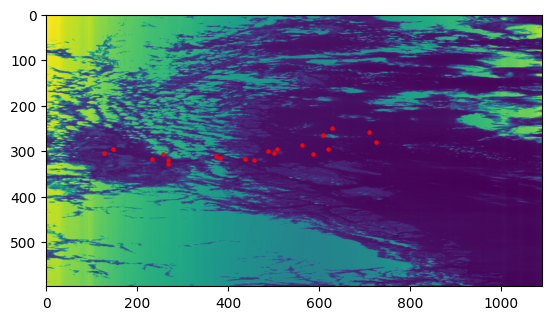

In [10]:
importlib.reload(uf)

RRS_NO_AC_H1_250511_A1_12 = uf.automated_RRS_NO_AC_H2(satobj_h2_250423_12, l1d_cube_250423_12, target_lat_1, target_lon_1, latitude_250423_12, longitude_250423_12)
RRS_NO_AC_H1_250511_A2_12 = uf.automated_RRS_NO_AC_H2(satobj_h2_250423_12, l1d_cube_250423_12, target_lat_2, target_lon_2, latitude_250423_12, longitude_250423_12)
RRS_NO_AC_H1_250511_A3_12 = uf.automated_RRS_NO_AC_H2(satobj_h2_250423_12, l1d_cube_250423_12, target_lat_3, target_lon_3, latitude_250423_12, longitude_250423_12)
RRS_NO_AC_H1_250511_A4_12 = uf.automated_RRS_NO_AC_H2(satobj_h2_250423_12, l1d_cube_250423_12, target_lat_5, target_lon_5, latitude_250423_12, longitude_250423_12)
RRS_NO_AC_H1_250511_A5_12 = uf.automated_RRS_NO_AC_H2(satobj_h2_250423_12, l1d_cube_250423_12, target_lat_6, target_lon_6, latitude_250423_12, longitude_250423_12)

In [11]:
RRS_median_H1_NO_AC_A1_12 = np.median(RRS_NO_AC_H1_250511_A1_12, axis=0)
RRS_median_H1_NO_AC_A2_12 = np.median(RRS_NO_AC_H1_250511_A2_12, axis=0)
RRS_median_H1_NO_AC_A3_12 = np.median(RRS_NO_AC_H1_250511_A3_12, axis=0)
RRS_median_H1_NO_AC_A4_12 = np.median(RRS_NO_AC_H1_250511_A4_12, axis=0)
RRS_median_H1_NO_AC_A5_12 = np.median(RRS_NO_AC_H1_250511_A5_12, axis=0)

print(RRS_median_H1_NO_AC_A1_12.shape)

(109,)


## EnMap

[0.04954314 0.04562826 0.03946608 0.04181925 0.04263979 0.04286167
 0.04399306 0.04300351 0.04155329 0.0407995  0.0393043  0.03791131
 0.03644623 0.03441101 0.03166409 0.03168171 0.0307026  0.02829844
 0.02767118 0.02638738 0.0240915  0.02380855 0.02352948 0.0226077
 0.02165718 0.02048313 0.01988707 0.01922829 0.01807244 0.01715377
 0.01655906 0.01571112 0.0151872  0.01475475 0.01378896 0.01326208
 0.01260513 0.01193161 0.01136267 0.01083154 0.01058878 0.00997752
 0.00973718 0.00951162 0.00902539 0.00845228 0.00822585 0.00800471
 0.00770551 0.00732082 0.00640084 0.00612281 0.00617252 0.00595214
 0.00554909 0.00492316 0.00461418 0.00451034 0.00422636 0.00401908
 0.00346894 0.00227195 0.00324072 0.00326784 0.00314326 0.00295211]
(28, 66)


/tmp/ipykernel_1682242/2963796468.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


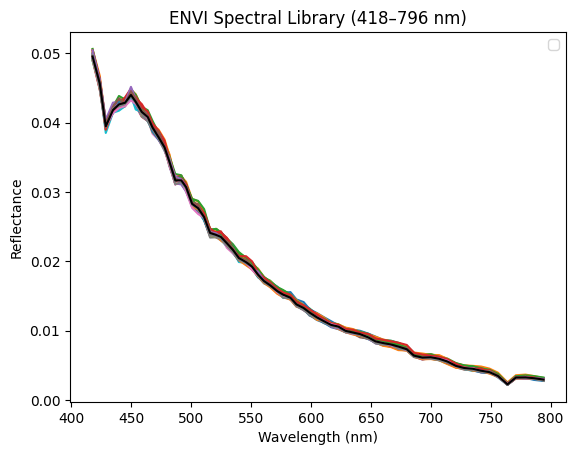

In [12]:
import spectral
import matplotlib.pyplot as plt
import numpy as np

# Last spektralbiblioteket
spectra = spectral.io.envi.open('../../EnMap/data/23April_2025_L1C_noAC.hdr', '../../EnMap/data/23April_2025_L1C_noAC.sli')
data = spectra.spectra  # (n_spectra x n_bands)

# Hent wavelengths (i µm) og konverter til nm
header = spectral.envi.read_envi_header('../../EnMap/data/23April_2025_L1C_noAC.hdr')
wavelengths_um = header['wavelength']
wavelengths_nm = [float(w) * 1000 for w in wavelengths_um]

# Filtrer basert på ønsket bølgelengdeintervall
min_nm, max_nm = 418, 796
mask = [(w >= min_nm and w <= max_nm) for w in wavelengths_nm]

# Bruk masken til å filtrere både data og wavelengths
filtered_wavelengths = [w for w, m in zip(wavelengths_nm, mask) if m]
filtered_data = data[:, mask]  # Mask langs spektralbånd (aksen 1)

## fikse dette
median_data_EnMap = np.median(np.array(filtered_data), axis = 0)
print(median_data_EnMap)
print(filtered_data.shape)

# Plotting
for i in range(filtered_data.shape[0]):
    plt.plot(filtered_wavelengths, filtered_data[i], )#label=f"Spectrum {i+1}")
plt.plot(filtered_wavelengths, median_data_EnMap, color = "black")

plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('ENVI Spectral Library (418–796 nm)')
plt.legend()
plt.show()


## Variation

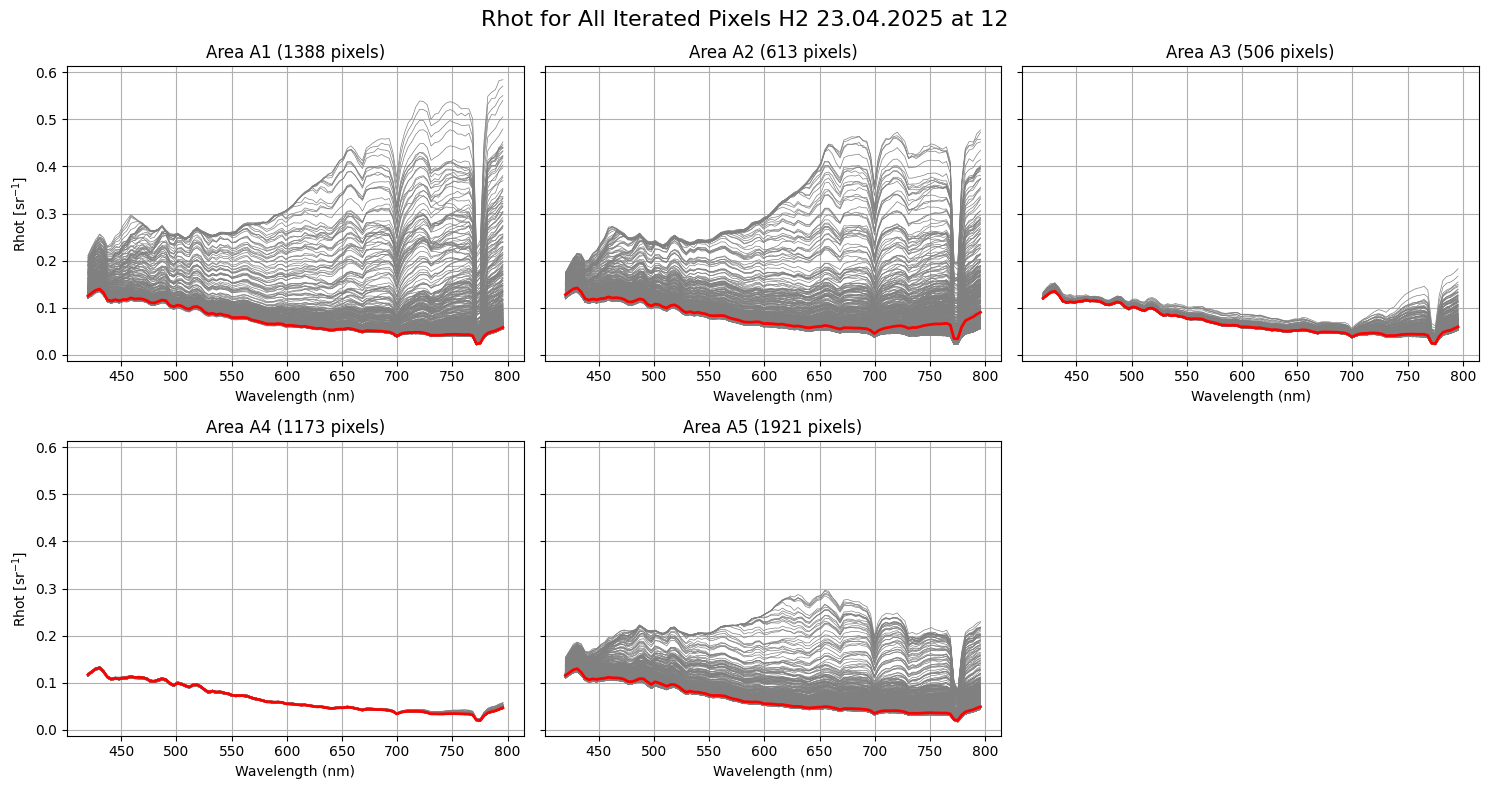

In [17]:
areas = ["A1", "A2", "A3", "A4", "A5"]
data_dict = {
    "A1": (RRS_NO_AC_H1_250511_A1_12, RRS_median_H1_NO_AC_A1_12),
    "A2": (RRS_NO_AC_H1_250511_A2_12, RRS_median_H1_NO_AC_A2_12),
    "A3": (RRS_NO_AC_H1_250511_A3_12, RRS_median_H1_NO_AC_A3_12),
    "A4": (RRS_NO_AC_H1_250511_A4_12, RRS_median_H1_NO_AC_A4_12),
    "A5": (RRS_NO_AC_H1_250511_A5_12, RRS_median_H1_NO_AC_A5_12),
}

# Create the figure and subplots in a 2-row grid
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8), sharey=True)
axs = axs.flatten()

for idx, area in enumerate(areas):
    ax = axs[idx]
    spectra, median_rrs = data_dict[area]
    spectra = np.array(spectra)
    n_pixels = spectra.shape[0]

    # Plot individual spectra
    for i in range(n_pixels):
        ax.plot(wl, spectra[i], color='gray', linewidth=0.5)

    # Plot median spectrum
    ax.plot(wl, median_rrs, color='red', linewidth=2)

    # Add area and pixel count to title
    ax.set_title(f"Area {area} ({n_pixels} pixels)")
    ax.set_xlabel("Wavelength (nm)")
    ax.grid(True)

# Set shared Y-axis label on first column
axs[0].set_ylabel(r"Rhot [sr$^{-1}$]")
axs[3].set_ylabel(r"Rhot [sr$^{-1}$]")


# Hide the unused 6th subplot
if len(areas) < len(axs):
    axs[-1].axis("off")

fig.suptitle("Rhot for All Iterated Pixels H2 23.04.2025 at 12", fontsize=16)


plt.tight_layout()
plt.savefig('../resultater/H2noAC/H2vsH2_variance_23April_12.pdf', dpi=300, bbox_inches='tight')
plt.show()


## Plot

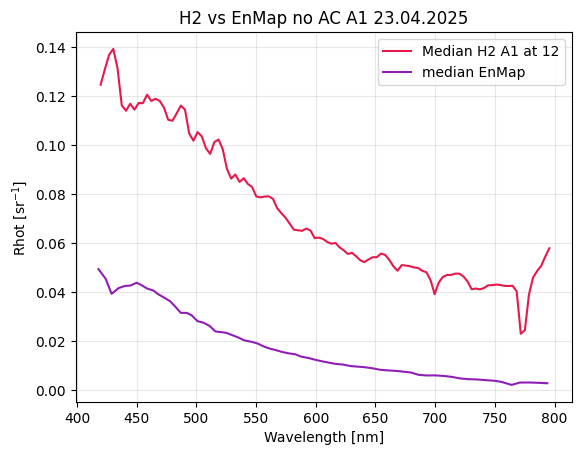

In [14]:
#H2 kl 10
#plt.plot(wl, RRS_median_H1_NO_AC_A1_10, color="#e6194b", linestyle= '-', label='median H2 at 10')
#plt.plot(wl, RRS_median_H1_NO_AC_A2_10, color="#e6194b", linestyle= '-', )#label='median H2 A2 AC')
#plt.plot(wl, RRS_median_H1_NO_AC_A3_10, color="#e6194b", linestyle= '-', label='median H2 at 10')# label='median H2 A3 AC at 10')
#plt.plot(wl, RRS_median_H1_NO_AC_A4_10, color="#e6194b", linestyle= '-', label='median H2 A4 at 10')
#plt.plot(wl, RRS_median_H1_NO_AC_A5_10, color="#e6194b", linestyle= '-', )#label='median H2 A5 AC',  )#marker="o")

#H2 kl 12
plt.plot(wl, RRS_median_H1_NO_AC_A1_12, color="#e6194b" , linestyle= '-', label="Median H2 A1 at 12" )#label='median H2 A1 AC')
#plt.plot(wl, RRS_median_H1_NO_AC_A2_12, color="#3cb44b" , linestyle= '-', label='Median H2 A2 at 12')
#plt.plot(wl, RRS_median_H1_NO_AC_A3_12, color="#911eb4" , linestyle= '-', label='Median H2 A3 at 12' )#label='median H2 A3 AC at 12')
#plt.plot(wl, RRS_median_H1_NO_AC_A4_12, color="#0082c8" , linestyle= '-', label='Median H2 A4 at 12')
#plt.plot(wl, RRS_median_H1_NO_AC_A5_12, color="#f58231" , linestyle= '-', label='Median H2 A5 at 12') #marker="o")

plt.plot(filtered_wavelengths, median_data_EnMap, color = "#911eb4", label = "median EnMap")


plt.xlabel("Wavelength [nm]")
plt.ylabel("Rhot [sr$^{-1}$] ")  #Er begge water leaving radience???
plt.title("H2 vs EnMap no AC A1 23.04.2025") ## bruke AC som Atmosperic Correction 
plt.grid(True, alpha=0.3)
plt.legend()
plt.savefig('../resultater/H2vsEnMap_noAC_A4_10_12.pdf', dpi=300, bbox_inches='tight')
plt.show()

## få inn ecolighs her 
## fikse plottings alg, så det er så enkelt å kjapt du kan få det... Fortsette på det du har gjort. Bra jobba
## fikse så du kan vise disse plotsa til Esmée i morgen så hu kan lage flere ulike til torsdag :)) Da dette kan diskuteres med Morten

## Land plot

hei fra utformet bedre :)


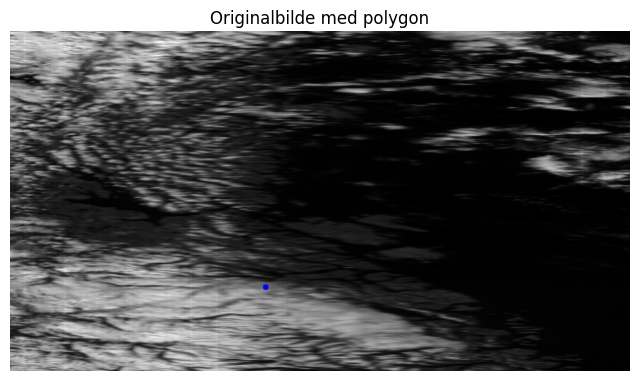

In [15]:
importlib.reload(uf)
#land_pixel_lat = [63.705331, 63.705331, 63.705331, 63.705331]
#land_pixel_long = [9.629517, 9.629517, 9.629517, 9.629517]

land_pixel_lat = [63.592245, 63.592245, 63.592245, 63.592245]
land_pixel_long = [8.783240, 8.783240, 8.783240, 8.783240]


#row_land, col_land = uf.lat_long_to_piksel(land_pixel_lat, land_pixel_long, latitude_250423_10, longitude_250423_10)
#print(row_land)
#print(col_land)

cloud = [450, 450, 450, 450]

row_land_calibrated = cloud[1] # row_land[1] #
col_land_calibrated = cloud[1] # col_land[1] #

rrs_land = l1d_cube_250423_12[row_land_calibrated, col_land_calibrated, 9:118]

#uf.piksles_to_area_check(row_land, col_land, l1d_cube_250423_10,0, 0)
uf.piksles_to_area_check(cloud, cloud, l1d_cube_250423_12,0, 0)

hei fra utformet bedre :)


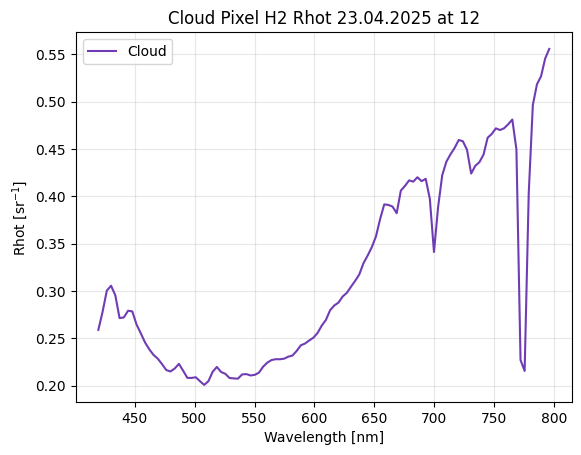

In [16]:
#print(l1d_cube_230330)
importlib.reload(uf)
#H1
plt.plot(wl, rrs_land, color="#703cb4", linestyle= '-', label = 'Cloud')


plt.xlabel("Wavelength [nm]")
plt.ylabel("Rhot [sr$^{-1}$] ") #Er begge water leaving radience???
plt.title("Cloud Pixel H2 Rhot 23.04.2025 at 12") ## bruke AC som Atmosperic Correction 
plt.grid(True, alpha=0.3)
plt.legend()
plt.savefig('../resultater/H2noAC/cloud.pdf', dpi=300, bbox_inches='tight')
plt.show()

## få inn ecolighs her 
## fikse plottings alg, så det er så enkelt å kjapt du kan få det... Fortsette på det du har gjort. Bra jobba
## fikse så du kan vise disse plotsa til Esmée i morgen så hu kan lage flere ulike til torsdag :)) Da dette kan diskuteres med Morten